# PRODIGY_WD_01

In [3]:
 import pandas as pd 
 import seaborn as sns
 import numpy as np
 import matplotlib.pyplot as plt
 import missingno as msno
 from sklearn import linear_model

In [4]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [5]:
df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train.shape

(1460, 81)

In [10]:
train.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [11]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
# fill the null values(int) by average values
train.fillna(df.mean().iloc[0],inplace =True)

In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [15]:
train=train.drop("Id",axis=1)

In [16]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,2190.0,Reg,Lvl,AllPub,Inside,...,0,2190.0,2190.0,2190.0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,2190.0,Reg,Lvl,AllPub,FR2,...,0,2190.0,2190.0,2190.0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,2190.0,IR1,Lvl,AllPub,Inside,...,0,2190.0,2190.0,2190.0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,2190.0,IR1,Lvl,AllPub,Corner,...,0,2190.0,2190.0,2190.0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,2190.0,IR1,Lvl,AllPub,FR2,...,0,2190.0,2190.0,2190.0,0,12,2008,WD,Normal,250000


In [17]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [18]:
train.shape

(1460, 80)

In [19]:
from sklearn.preprocessing import LabelEncoder

def inplace_encode_categorical_columns(train, test):
    """
    In-place label encode categorical columns in train and test DataFrames using Label Encoding.

    Parameters:
    - train_df: pandas DataFrame (training dataset)
    - test_df: pandas DataFrame (test dataset)

    Returns:
    - label_encoders: Dictionary containing LabelEncoders for each encoded column
    """
    label_encoders = {}

    # Concatenate train and test datasets for consistent encoding
    combined_df = pd.concat([train, test], ignore_index=True)

    for column in combined_df.select_dtypes(include='object').columns:
        # Convert the column to string type
        combined_df[column] = combined_df[column].astype(str)

        le = LabelEncoder()
        combined_df[column] = le.fit_transform(combined_df[column])
        label_encoders[column] = le

    # Split back to train and test datasets
    train_df_encoded = combined_df.iloc[:len(train)]
    test_df_encoded = combined_df.iloc[len(train):]

    return train_df_encoded, test_df_encoded, label_encoders

# Example usage:
# Assume train_df and test_df are your DataFrames with categorical columns

# Now, train_df_encoded and test_df_encoded contain the datasets with categorical columns encoded in place,
# and encoders is a dictionary with LabelEncoders for each encoded column.


In [20]:
train_df_encoded, test_df_encoded, encoders = inplace_encode_categorical_columns(train, test)


In [21]:
train_df_encoded

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,2,2008,8,4,208500.0,NaN
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,5,2007,8,4,181500.0,NaN
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,9,2008,8,4,223500.0,NaN
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,2,2006,8,0,140000.0,NaN
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,12,2008,8,4,250000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,0,0,8,2007,8,4,175000.0,NaN
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,3,0,0,2,2010,8,4,210000.0,NaN
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,1,3,2500,5,2010,8,4,266500.0,NaN
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,0,0,4,2010,8,4,142125.0,NaN


In [22]:
train_df_encoded.drop("Id", inplace=True, axis=1)

In [23]:
train_df_encoded.select_dtypes(include='object')

""
0
1
2
3
4
...
1455
1456
1457
1458


In [24]:
X=train_df_encoded.iloc[:,:-1]
y=train_df_encoded.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression


In [27]:

model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(X_train)

In [30]:
model.score(X_train,y_train)

0.8729715913403875

In [31]:
model.score(X_test,y_test)

0.8298757792387543

In [37]:
# training the model & evaluation matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'Mean Absolute Error on Validation Set: {mae}')
print(f'R-squared Score on Validation Set: {r2}')

Mean Squared Error on Validation Set: 764530064.0865769
Mean Absolute Error on Validation Set: 17764.704579385427
R-squared Score on Validation Set: 0.8729715913403875


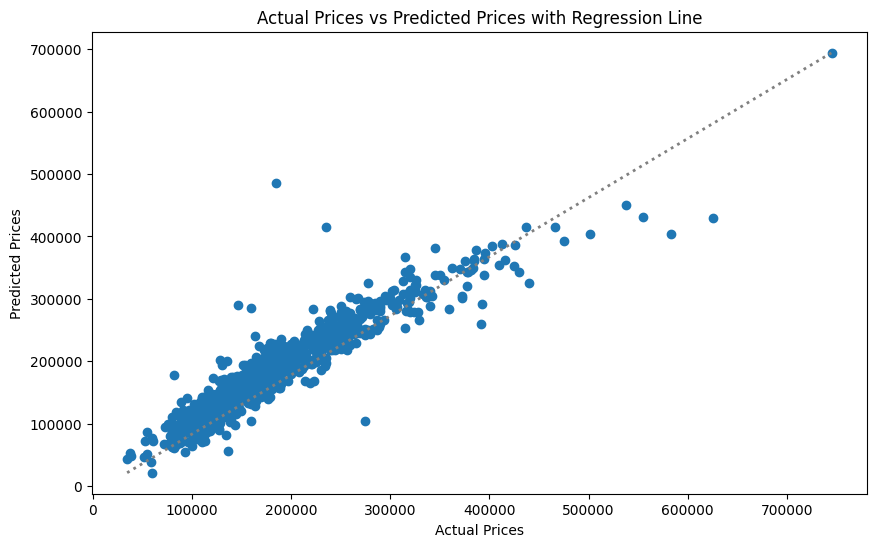

In [33]:
#@title Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_pred), max(y_pred)], color='gray', linestyle=':', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()